<a href="https://colab.research.google.com/github/Rupsha-Chatterjee/Assignments_TIU/blob/main/Iris_Rupsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris=sns.load_dataset("iris")

In [4]:
iris.shape

(150, 5)

In [5]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris[iris.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [12]:
iris=iris.drop_duplicates()

In [13]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


In [14]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


In [15]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.690314,-0.042826,1.283321,0.519966
sepal_width,-0.042826,0.190395,-0.328622,-0.120758
petal_length,1.283321,-0.328622,3.125083,1.297968
petal_width,0.519966,-0.120758,1.297968,0.581593


In [16]:
from sklearn.model_selection import train_test_split

x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [20]:
print("confusion matrix: ")
print(cm)
print("accuracy: ", ac*100)
print("classification report: ")
print(cr)

confusion matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy:  100.0
classification report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feda9e41990>,
      dtype=object)

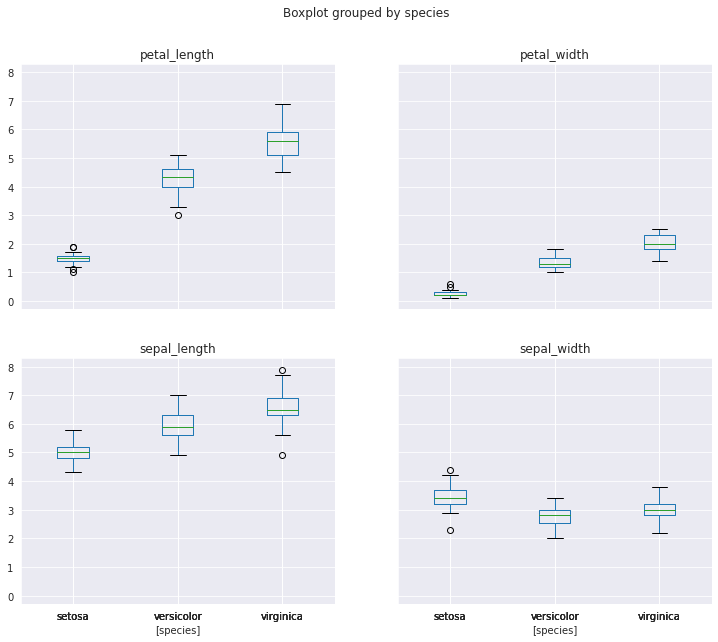

In [21]:
sns.set_style('darkgrid')
iris.boxplot(by='species', figsize=(12,10))

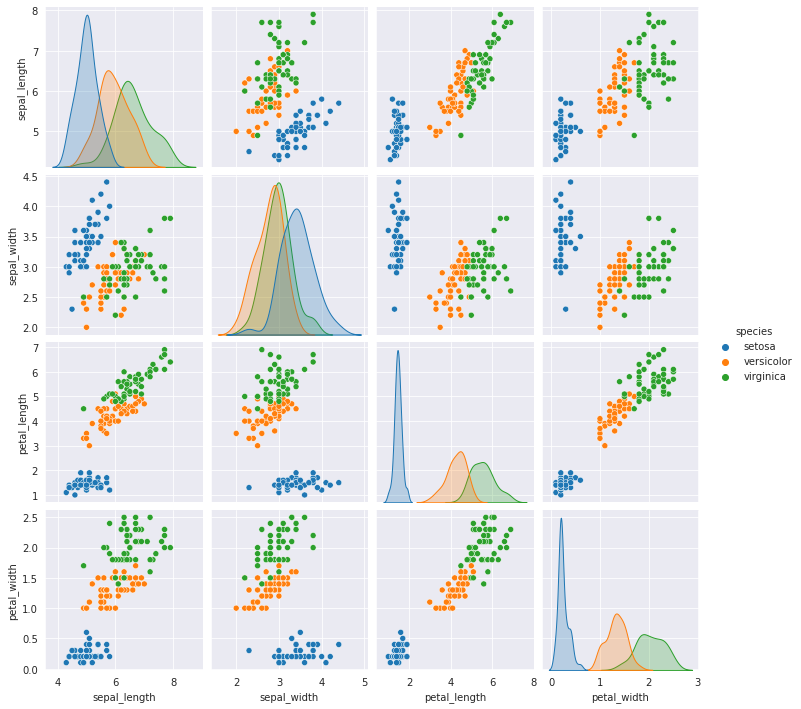

In [22]:
sns.set_style('darkgrid')
sns.pairplot(data=iris,hue='species')